In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [2]:
crime = pd.read_csv("crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
crime.shape

(50, 5)

In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
crime.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

# There is no null value

# Normilazation Function

In [6]:
def minmax_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [7]:
#Normalized data from (considaring the numerical part of data)
crime = minmax_func(crime.iloc[:,1:])

In [8]:
crime

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


# CREATE DENDROGRAM

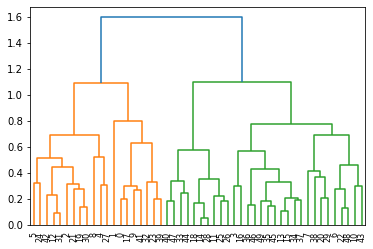

In [9]:
import scipy.cluster.hierarchy as sch
denderogram = sch.dendrogram(sch.linkage(crime,method='complete'))

# Create Cluster

In [10]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4,affinity = 'euclidean',linkage ='complete')

In [11]:
#Create labels
y_hc = hc.fit_predict(crime)
y_hc

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [12]:
cluster = pd.DataFrame(y_hc,columns=["Clusters"])
cluster

,Clusters
0,0
1,0
2,3
3,1
4,3
5,3
6,1
7,1
8,3
9,0


In [13]:
crime.value_counts()

Murder    Assault   UrbanPop  Rape    
0.000000  0.000000  0.203390  0.000000    1
0.632530  0.873288  0.593220  0.529716    1
0.427711  0.544521  0.779661  0.811370    1
0.439759  0.852740  0.813559  0.612403    1
0.463855  0.380137  0.525424  0.346253    1
0.481928  0.496575  0.305085  0.315245    1
0.493976  0.455479  0.644068  0.540052    1
          0.791096  1.000000  0.860465    1
0.536145  0.219178  0.338983  0.232558    1
0.554217  0.746575  0.271186  0.961240    1
0.578313  0.698630  0.864407  0.431525    1
0.620482  0.715753  0.915254  0.485788    1
0.638554  0.821918  0.644068  0.640827    1
0.078313  0.041096  0.406780  0.056848    1
0.680723  0.719178  0.711864  0.718346    1
0.686747  0.708904  0.830508  1.000000    1
0.716867  0.534247  0.813559  0.470284    1
0.734940  1.000000  0.220339  0.227390    1
0.746988  0.489726  0.457627  0.506460    1
          0.654110  0.440678  0.359173    1
0.819277  0.801370  0.271186  0.392765    1
0.879518  0.698630  0.576271  0.38501

In [14]:
crime["h_clusterid"] = y_hc
crime

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,0
2,0.439759,0.852740,0.813559,0.612403,3
3,0.481928,0.496575,0.305085,0.315245,1
4,0.493976,0.791096,1.000000,0.860465,3
5,0.427711,0.544521,0.779661,0.811370,3
6,0.150602,0.222603,0.762712,0.098191,1
7,0.307229,0.660959,0.677966,0.219638,1
8,0.879518,0.993151,0.813559,0.635659,3
9,1.000000,0.568493,0.474576,0.478036,0


In [15]:
crime.groupby("h_clusterid").mean()

,Murder,Assault,UrbanPop,Rape
h_clusterid,,,,
0,0.800452,0.711473,0.364407,0.445413
1,0.296084,0.298973,0.657627,0.279070
2,0.143373,0.115411,0.293220,0.111886
3,0.607430,0.725742,0.785311,0.644703


# K-Means

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc = StandardScaler()
sc_crime = sc.fit_transform(crime.iloc[:,1:])

In [18]:
sc_crime

array([[ 0.79078716, -0.52619514, -0.00345116, -1.48365074],
       [ 1.11805959, -1.22406668,  2.50942392, -1.48365074],
       [ 1.49381682,  1.00912225,  1.05346626,  1.4446073 ],
       [ 0.23321191, -1.08449238, -0.18679398, -0.50756473],
       [ 1.2756352 ,  1.77678094,  2.08881393,  1.4446073 ],
       [ 0.40290872,  0.86954794,  1.88390137,  1.4446073 ],
       [-0.73648418,  0.79976079, -1.09272319, -0.50756473],
       [ 0.81502956,  0.45082502, -0.58583422, -0.50756473],
       [ 1.99078607,  1.00912225,  1.1505301 ,  1.4446073 ],
       [ 0.48775713, -0.38662083,  0.49265293, -1.48365074],
       [-1.51224105,  1.21848371, -0.11129987, -0.50756473],
       [-0.61527217, -0.80534376, -0.75839217,  0.46852129],
       [ 0.94836277,  1.21848371,  0.29852525,  1.4446073 ],
       [-0.70012057, -0.03768506, -0.0250209 , -0.50756473],
       [-1.39102904, -0.5959823 , -1.07115345,  0.46852129],
       [-0.67587817,  0.03210209, -0.34856705, -0.50756473],
       [-0.74860538, -0.

In [19]:
from sklearn.cluster import KMeans

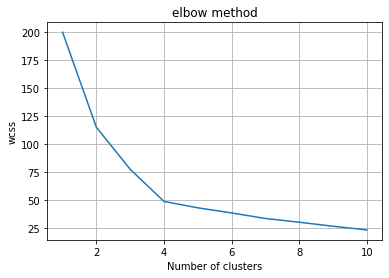

In [20]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(sc_crime)
    wcss.append( km.inertia_)
    
plt.plot(range(1,11),wcss)
plt.grid()
plt.title('elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [21]:
wcss

[200.0,
 114.94822940640931,
 77.31882332258851,
 48.529745592126446,
 42.813345704621156,
 38.2308704270304,
 33.267445497762864,
 29.92279388854307,
 26.3093214702487,
 23.032137354581568]

# Final Model

In [22]:
#swlwction 4 clusters from above scree plot
model =KMeans(n_clusters=4)
model.fit(crime)
model.labels_

array([3, 3, 0, 1, 0, 0, 1, 1, 0, 3, 1, 2, 0, 1, 2, 1, 1, 3, 2, 0, 1, 0,
       1, 3, 0, 2, 2, 0, 2, 1, 0, 0, 3, 2, 1, 1, 1, 1, 1, 3, 2, 3, 0, 1,
       2, 1, 1, 2, 1, 1])

In [23]:
x= crime.iloc[:,:].values
km = KMeans(n_clusters=4)

In [24]:
y_means = km.fit_predict(sc_crime)

In [25]:
y_means

array([3, 3, 2, 3, 2, 2, 0, 0, 2, 3, 0, 1, 2, 0, 1, 0, 1, 3, 1, 2, 0, 2,
       0, 3, 2, 1, 1, 2, 1, 0, 2, 2, 3, 1, 0, 0, 0, 0, 0, 3, 1, 3, 2, 0,
       1, 0, 0, 1, 0, 0])

In [26]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Murder       50 non-null     float64
 1   Assault      50 non-null     float64
 2   UrbanPop     50 non-null     float64
 3   Rape         50 non-null     float64
 4   h_clusterid  50 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
def object_to_int(crime):
    if crime.dtype == "object":
        crime = LabelEncoder().fit_transform(crime)
        
    return crime    

In [29]:
crime = crime.apply(lambda x: object_to_int(x))
crime.head()

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,0
2,0.439759,0.852740,0.813559,0.612403,3
3,0.481928,0.496575,0.305085,0.315245,1
4,0.493976,0.791096,1.000000,0.860465,3


In [30]:
x[y_means==0,0]

array([0.15060241, 0.30722892, 0.27108434, 0.38554217, 0.31325301,
       0.21686747, 0.11445783, 0.39759036, 0.39156627, 0.34939759,
       0.24698795, 0.3313253 , 0.15662651, 0.14457831, 0.46385542,
       0.19277108, 0.10843373, 0.36144578])

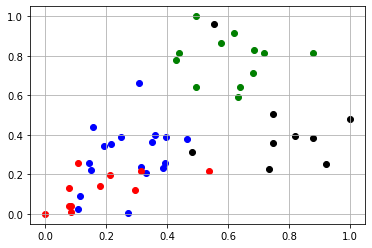

In [31]:
plt.scatter(x[y_means==0,0],x[y_means==0,1],color="Blue")
plt.scatter(x[y_means==1,0],x[y_means==1,1],color="Red")
plt.scatter(x[y_means==2,0],x[y_means==2,2],color="Green")
plt.scatter(x[y_means==3,0],x[y_means==3,3],color="Black")
plt.grid()
plt.show()

# DBSCAN

In [32]:
crime

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,0
2,0.439759,0.852740,0.813559,0.612403,3
3,0.481928,0.496575,0.305085,0.315245,1
4,0.493976,0.791096,1.000000,0.860465,3
5,0.427711,0.544521,0.779661,0.811370,3
6,0.150602,0.222603,0.762712,0.098191,1
7,0.307229,0.660959,0.677966,0.219638,1
8,0.879518,0.993151,0.813559,0.635659,3
9,1.000000,0.568493,0.474576,0.478036,0


In [33]:
array_DBSCAN = crime.values

In [34]:
array_DBSCAN

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313, 0.        ],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031, 0.        ],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 , 3.        ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548, 1.        ],
       [0.4939759 , 0.79109589, 1.        , 0.86046512, 3.        ],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951, 3.        ],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121, 1.        ],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824, 1.        ],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891, 3.        ],
       [1.        , 0.56849315, 0.47457627, 0.47803618, 0.        ],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333, 1.        ],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457, 2.        ],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455, 3.        ],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517, 1.        ],
       [0.08433735, 0.03767123, 0.

In [35]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
ms = MinMaxScaler()
x = ms.fit_transform(array_DBSCAN)

In [36]:
sc = StandardScaler()
X = sc.fit_transform(array_DBSCAN)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116, -1.48365074],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392, -1.48365074],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626,  1.4446073 ],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -0.50756473],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393,  1.4446073 ],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137,  1.4446073 ],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -0.50756473],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -0.50756473],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ,  1.4446073 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293, -1.48365074],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987, -0.50756473],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217,  0.46852129],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525,  1.4446073 ],
       [-0.13637203, -0.70012057, -0.0

In [37]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.2,min_samples=7)
dbscan.fit(X)

DBSCAN(eps=1.2, min_samples=7)

In [38]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1, -1, -1,  0, -1, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  0, -1,  0, -1, -1,  0,  0, -1,  0,  0, -1, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [39]:
crime['cluster']=pd.DataFrame(dbscan.labels_)
crime

,Murder,Assault,UrbanPop,Rape,h_clusterid,cluster
0,0.746988,0.654110,0.440678,0.359173,0,-1
1,0.554217,0.746575,0.271186,0.961240,0,-1
2,0.439759,0.852740,0.813559,0.612403,3,-1
3,0.481928,0.496575,0.305085,0.315245,1,0
4,0.493976,0.791096,1.000000,0.860465,3,-1
5,0.427711,0.544521,0.779661,0.811370,3,-1
6,0.150602,0.222603,0.762712,0.098191,1,0
7,0.307229,0.660959,0.677966,0.219638,1,0
8,0.879518,0.993151,0.813559,0.635659,3,-1
9,1.000000,0.568493,0.474576,0.478036,0,-1


In [40]:
crime["cluster"].value_counts()

 0    30
-1    20
Name: cluster, dtype: int64

In [41]:
#To find the percentage of noise points
(len(crime[crime['cluster']==-1])/len(crime))*100

40.0

In [42]:
from sklearn import metrics
X=metrics.silhouette_score(X,dbscan.labels_)
X

0.3824486278350877

In [43]:
def dbscan(X,eps,min_samples):
    ss=StandardScaler()
    db=DBSCAN(eps=eps,min_samples=min_samples)
    db.fit(X)
    y_pred=db.fit_predict(X)
    plt.scatter(x[:,1],x[:,1],c=y_pred,edgecolors='red')
    plt.scatter(x[:,2],x[:,1],c=y_pred,edgecolors='green')
    plt.scatter(x[:,3],x[:,1],c=y_pred)
    plt.title('DBSCAN')
    plt.grid()
    plt.show()

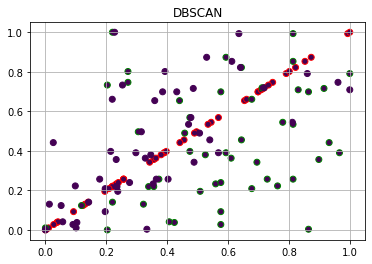

In [46]:
dbscan(sc_crime,0.3,7)